## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Juliet Mwaura
part time


# A) INTRODUCTION
In a time where original visual content is growing, understanding what the trend is and popular visual content isimportannt for Microsoft's venture into the movie industry. This project looks at the different types of movies that are doingwell,  what people seem to enjoy the mos and, offering actionable insights for Microsoft to employ in this new venture.
# B) PROBLEM STATEMENT
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.
# C) MAIN OBJECTIVE
The main objective is to identify popular box office trends and audience preferenres, providing actionable insights for Microsoft's new movie studio to create compelling, commercially successful films that resonate with audiences and differentiate the brand in the market.
# D) SPECIFIC OBJECTIVES
The specific objectives includes:

## 2. Business Understanding
Microsoft wants to begin a new venture in the film industry without prior expertise and knowledge. Therefore, this analysis aims to answer the following key data questions:

1. **Which studio movies are most watched ?**
   - Analyzing the studios performing well enables us to better what they do and even provide a chance for collaboration regarding creating film content.

2. **Which film genres have consistently performed well at the box office in recent years?**
   - Understanding the top-performing genres provides critical insights into market trends and audience preferences, guiding Microsoft's studio toward potentially lucrative areas of production.

2. **What is the relationship between production_budgets and gross(earnings)?**
   - Analyzing revenue trends in relation to the gross(earnings) helps quantify the financial potential and profitability of specific film types, enabling informed decisions on investment allocation.


To understand the datasets we are working with we first explore our data by loading the datasets.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import sqlite3

In [3]:
# Connect to the SQLite database
conn = sqlite3.connect('zippedData/im.db')
# Create a cursor object
cur = conn.cursor()
# Get the list of all tables
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
# Print all tables
print(cur.fetchall())
# Close the connection
conn.close()

[]


In [44]:

import zipfile
import os

# Path to the zipped SQLite database file
zip_file_path = 'zippedData/im.db.zip'
# Path to extract the SQLite database file
extracted_db_path = 'extracted_im.db'

# Unzip the SQLite database file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_db_path)

# Connect to the SQLite database
db_path = os.path.join(extracted_db_path, 'im.db')
conn = sqlite3.connect(db_path)

# Create a cursor object to interact with the database
cursor = conn.cursor()
    # Query to retrieve all table names
table_query = "SELECT name FROM sqlite_master WHERE type='table';"

    # Execute the query
cursor.execute(table_query)

    # Fetch all table names
tables = cursor.fetchall()

if tables:
        # Print the table names
        for table in tables:
            print(table[0])
else:
        print("No tables found in the database.")



movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers


In [53]:

# Read movie_basics table
movie_basics_query = "SELECT * FROM movie_basics LIMIT 10"  # Fetching first 10 rows
dfms = pd.read_sql_query(movie_basics_query, conn)
print("dfms")
print(dfms.head())

# Read movie_ratings table
movie_ratings_query = "SELECT * FROM movie_ratings LIMIT 10"  # Fetching first 10 rows
dfmr = pd.read_sql_query(movie_ratings_query, conn)
print('dfmr')
dfmr.head()

dfms
    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  
dfmr


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [7]:
#loading movie_gross csv dataset and viewing the first 5 rows
dfmg = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
dfmg. head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [8]:
#loading movie csv dataset and viewing the first 5 rows
dfm = pd.read_csv('zippedData/tmdb.movies.csv.gz')
dfm.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [10]:
#loading movie_budgets csv dataset and viewing the first 5 rows
dfmb = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
dfmb.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [12]:
#loading for a tsv file and displaying the first 5 rows
dfmi = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')

dfmi.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [14]:
#loading for a tsv file and displaying the first 5 rows
dfmw = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='latin-1')

dfmw.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


## 3. Data Understanding
The data utilized for this project is sourced from comprehensive databases such as the box office movies,the numbers and market research on film performances.These sources offer insights into film success metrics relevant to our analysis.

The dataset encompasses a broad range of films released in recent years, with information such as film title, release date, genre categorization, box office revenue, production budget, audience demographics (age, gender, location), critical ratings, and perhaps viewer ratings. All these information allows for comprehensive analysis and exploration of correlations between genres, revenues, audience characteristics, and critical reception, thus being a firm foundation for deriving actionable insights to guide Microsoft's movie studio endeavors.

To better understand the data, below presents the size of the dataset and descriptive statistics for all features used in the analysis

In [28]:
dfmg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [29]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [30]:
dfmb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [31]:
dfmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [32]:
dfmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


## 4. Data Preparation/Cleaning

In preparing the data for analysis, several steps were taken to ensure the data's quality, relevance, and reliability. Here's an overview of the data preparation process and the reasoning behind it:

a)Checking for missing data. There are two ways which this could be handles which is either use the meadian as the missing values or drop the rows or columns with high percentage of missing values or critical information.

b)Checking for outliers.

c)Checking for duplicates.

The data preparation process was critical to ensuring that the subsequent analysis provided meaningful insights guiding decision-making for Microsoft's new movie studio venture.

### a)Cleaning movies_gross dataset

In [33]:
#checking bom_movie_gross missing values in the datasets
dfmg.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [34]:
# Drop missing values from the column studio since they are only five they won't affect the data much
dfmg.dropna(subset= 'studio', inplace = True)

In [35]:
# Also drop the missing values from
dfmg.dropna(subset = 'domestic_gross', inplace = True)

In [36]:
#converting the data type of values in foreign gross column into float
dfmg['foreign_gross'] = dfmg['foreign_gross'].str.replace(',', '').astype(float)

# the distribution of foreign_gross is right skewed we'll use median to replace our misssing data
dfmg['foreign_gross'].fillna(dfmg['foreign_gross'].median(), inplace = True)

In [37]:
#checking bom_movie_gross has no missing values in the datasets
dfmg.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

### b)Cleaning movies_budgets dataset

In [38]:
#cleaning missing value tn_movie
dfmb.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [39]:
#since there are no missing gata we check for duplicates
#checking for duplicates in movie
def unique_column_duplicates(data, column):


    duplicated_count = data[column].duplicated().sum()

    if duplicated_count == 0:
        print(f"The column {column.title()} has no duplicates.")
    else:
        print(f"The column {column.title()} has {duplicated_count} duplicated rows.")


unique_column_duplicates(dfmb, 'movie')
unique_column_duplicates(dfmb, 'id')


The column Movie has 84 duplicated rows.
The column Id has 5682 duplicated rows.


In [40]:
#  dropping duplicates from movie column
dfmb.drop_duplicates(subset= "movie", keep="first", inplace=True)

In [41]:
dfmb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5698 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5698 non-null   int64 
 1   release_date       5698 non-null   object
 2   movie              5698 non-null   object
 3   production_budget  5698 non-null   object
 4   domestic_gross     5698 non-null   object
 5   worldwide_gross    5698 non-null   object
dtypes: int64(1), object(5)
memory usage: 311.6+ KB


### c)Cleaning movies basics dataset

In [54]:
#checking for missing values
dfms.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    3
genres             0
dtype: int64

In [55]:
#dropping the rows
dfms['runtime_minutes'].dropna()

0    175.0
1    114.0
2    122.0
4     80.0
5     75.0
7     83.0
9     82.0
Name: runtime_minutes, dtype: float64

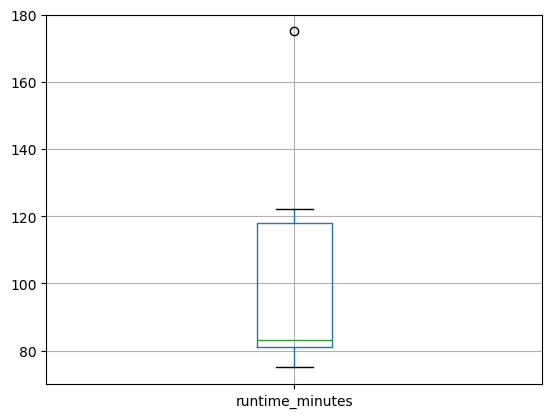

In [56]:
#checking for outliers in movie basics
data = dfms
data.boxplot(column ='runtime_minutes')
plt.show()

In [57]:
# dealing with outliers
Q1 = dfms['runtime_minutes'].quantile(0.25)
Q3 = dfms['runtime_minutes'].quantile(0.75)
IQR = Q3 - Q1

# Filter out data points beyond the IQR range
data_no_outliers = dfms[(dfms['runtime_minutes'] >= Q1 - 1.5 * IQR)
                                     & (dfms['runtime_minutes'] <= Q3 + 1.5 * IQR)]

In [58]:
# Checking for duplicates
def unique_column_duplicates(data, column):
    
    # Check for duplicates in the specified column
    duplicated_count = data[column].duplicated().sum()
    
    if duplicated_count == 0:
        print(f"The column {column.title()} has no duplicates.")
    else:
        print(f"The column {column.title()} has {duplicated_count} duplicated rows.")


unique_column_duplicates(dfms, 'movie_id')

The column Movie_Id has no duplicates.


### d) Cleaning movies rating dataset

In [61]:
#first check for missing values

dfmr.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [63]:
#chck for duplicates
unique_column_duplicates(dfmr, 'movie_id')

The column Movie_Id has no duplicates.


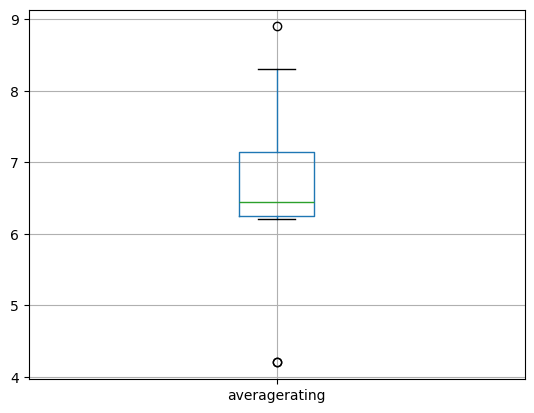

In [64]:
#checking for outliers
data = dfmr
data.boxplot(column ='averagerating')
plt.show()

In [65]:
# dealing with outliers
Q1 = dfmr['averagerating'].quantile(0.25)
Q3 = dfmr['averagerating'].quantile(0.75)
IQR = Q3 - Q1

# Filter out data points beyond the IQR range
data_no_outliers = dfmr[(dfmr['averagerating'] >= Q1 - 1.5 * IQR)
                                     & (dfmr['averagerating'] <= Q3 + 1.5 * IQR)]

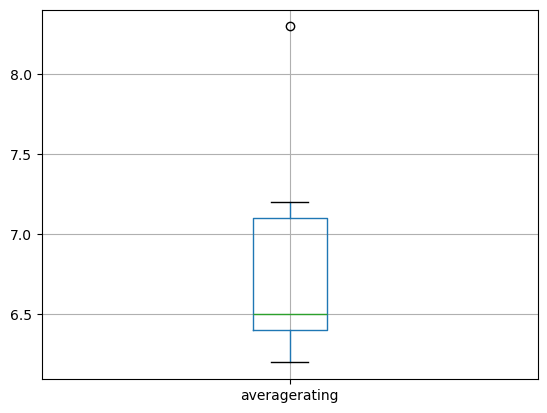

In [67]:
data_no_outliers.boxplot(column ='averagerating')
plt.show()

### Merging movie_basics with movie_ratings

In [74]:

dfbt=pd.read_sql( """
    SELECT *
    FROM movie_basics
    FULL JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
    LIMIT 10;
""",conn)

dfbt.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119.0


## 5. Data Analysis and Evaluation
In this section we use methods such as Exploratory Data Analysis(EDA) which utilises staistical and visualisation techniques in the already cleaned data so as to come up with insights about our objectives and therefore recommendation to Microsoft.   audiences.

#### a) Genre and rating

In [75]:
#finding the top 5 most performing genre
movie_genre = dfbt.groupby('genres')['averagerating'].median().sort_values(ascending=False)
mv_genre = movie_genre.head()
mv_genre

genres
Adventure,Animation,Comedy    8.1
Biography,Drama               7.2
Action,Crime,Drama            7.0
Drama                         6.9
Comedy,Drama,Fantasy          6.5
Name: averagerating, dtype: float64

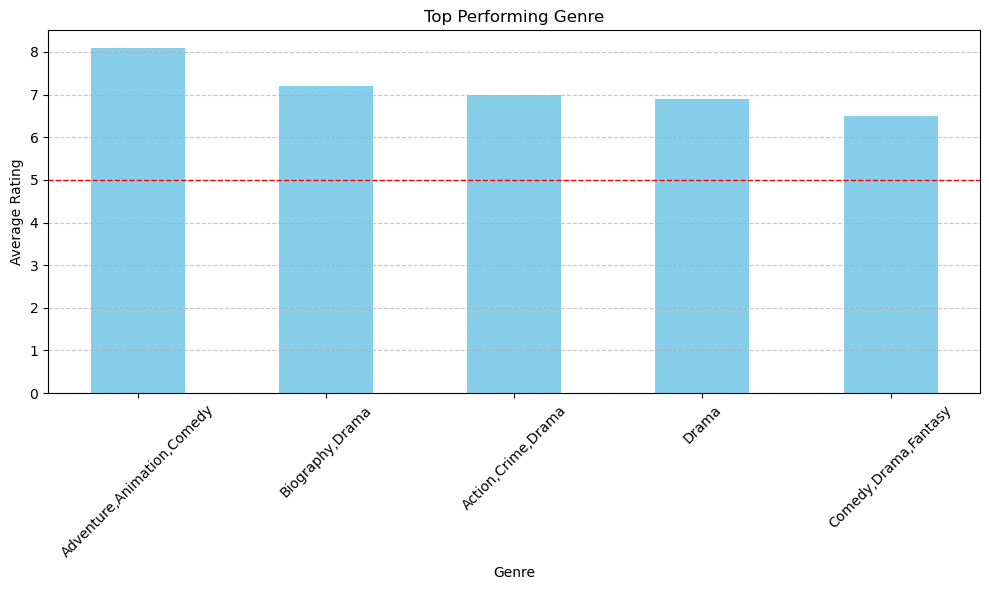

In [84]:
# Sample data
genres = ['Adventure,Animation,Comedy', 'Biography,Drama', 'Action,Crime,Drama', 'Drama', 'Comedy,Drama,Fantasy']
ratings = mv_genre

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(genres, ratings, color='skyblue', width = 0.5)

# Title and labels
plt.title('Top Performing Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotating x-axis labels 
plt.xticks(rotation=45)

# Adding horizontal line at average rating 5 for reference 
plt.axhline(y=5, color='red', linestyle='--', linewidth=1)

# Adjusting layout 
plt.tight_layout()

# Show plot
plt.show()


From the visualization above comparing each genre with the ratings we get to see that the top three performing genres are:-

*Adventure,Animation,Comedy

*Biography,Drama

*Action,Crime,Drama

Investiese ticular genres could prove profitable as they are highly rated by the  thus highly preferedudience.

#### b) top performing studios

In [85]:
dfmg.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [89]:
#finding the top most performing studio
studio_earnings = dfmg.groupby('studio')['domestic_gross'].median().sort_values(ascending=False)
#select top 10 studios
TopStudios = studio_earnings.head(5)
TopStudios

studio
P/DW       157250000.0
BV          92100000.0
Sony        63500000.0
WB (NL)     63100000.0
Fox         62150000.0
Name: domestic_gross, dtype: float64

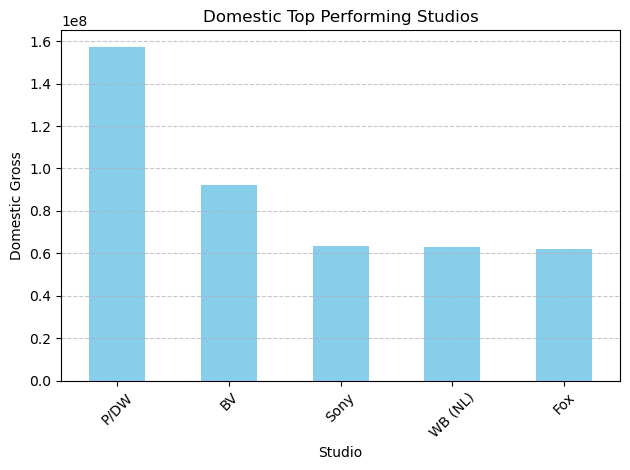

In [95]:
TopStudios.plot(kind='bar', color= 'skyblue')
plt.title('Domestic Top Performing Studios')
plt.xlabel('Studio')
plt.ylabel('Domestic Gross')

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotating x-axis labels 
plt.xticks(rotation=45)

# Adjusting layout 
plt.tight_layout()

# Show plot
plt.show()

In [93]:
#finding the top most performing studio
studio_earns = dfmg.groupby('studio')['foreign_gross'].median().sort_values(ascending=False)
#select top 10 studios
Topstudios = studio_earns.head(5)
Topstudios

studio
HC          867600000.0
P/DW        341500000.0
GrtIndia    234000000.0
WAMCR       134950000.0
BV          122750000.0
Name: foreign_gross, dtype: float64

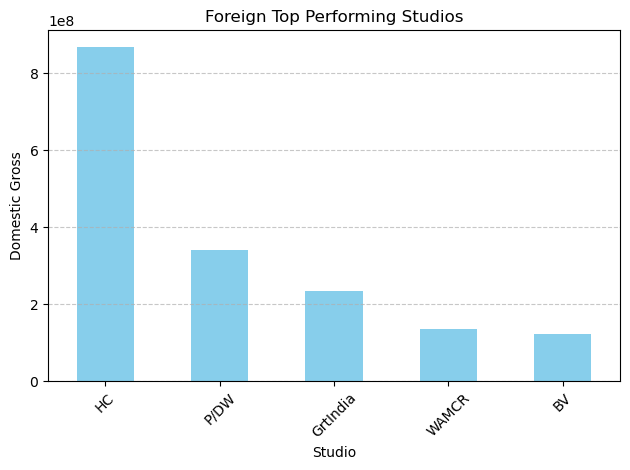

In [94]:
Topstudios.plot(kind='bar', color= 'skyblue')
plt.title('Foreign Top Performing Studios')
plt.xlabel('Studio')
plt.ylabel('Domestic Gross')

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotating x-axis labels 
plt.xticks(rotation=45)

# Adjusting layout 
plt.tight_layout()

# Show plot
plt.show()

From the visualization above comparing each studio with the earnings we get to see that the top three performing studios in both domestic and foreign markets. Domestic market top 3 are:-

*(P/DW)-Paramount Pictures/Dream Works

*(BV)-Buena Vista


(P/DW)-Paramount Pictures/Dream Works seems to be doing well in both foreign and domestic market thus a well performing studio.*Sony

Microsoft can partner and collaborate with this top performing studios will enhance chances of producing movies with high revenues as we can capitalize on their existing success and market presence.

#### c) budget vs earnings

In [92]:
dfmb.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [109]:
# Convert production_budget and domestic_gross to numeric values
dfmb['production_budget'] = dfmb['production_budget'].replace('[\$,]', '', regex=True).astype(float)
dfmb['domestic_gross'] = dfmb['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
dfmb['worldwide_gross'] = dfmb['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Calculating the relationship between budget and worldwide gross
BvE = dfmb.groupby('production_budget')['worldwide_gross'].median().sort_values(ascending=False)
BvR = BvE.head()

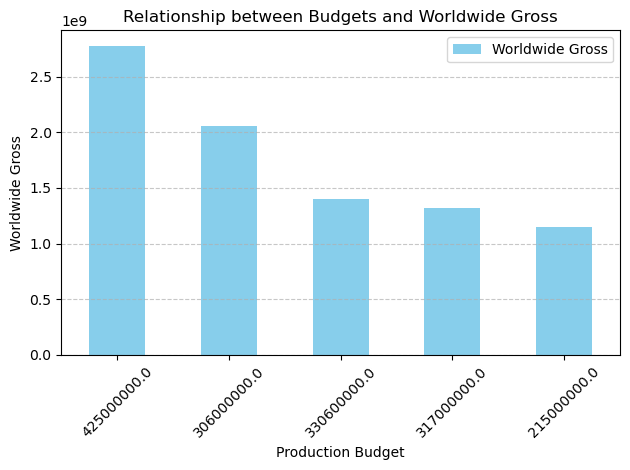

In [110]:
# Plotting the bar chart
BvR.plot(kind='bar', color='skyblue')
plt.title('Relationship between Budgets and Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotating x-axis labels 
plt.xticks(rotation=45)

# Adding a legend 
plt.legend(['Worldwide Gross'])

# Show plot
plt.tight_layout()  
plt.show()


From the visualization above comparing the production budget with the worldwide gross we get to see that the higher the production budget the higher the worldwide gross (revenue)

## 6. CONCLUSION

In conclusion, this analysis has provided valuable insights on the top performing studios for collaboration, the top genres that the market seems to prefer and the relationship between the budget and the revenue of these movies. However, it's essential to continuously validate and update these insights to ensure their ongoing relevance in an ever-evolving entertainment landscape.


## RECOMMENDATIONS
From this analysis, I would recommend Microsoft to implement the following steps as they would aid in Microsoft successful venture into creation of video content:
## 1.Work with large studios
Microsoft should aim to partner or even collaborate with established and larger film studios such as Paramount pictures/Dream Works(P/DW) and the other top studios froboth domestic and foreign market as this enhances the chance of producing movies with high revenues.
## 2.Market Analysis
Microsoft should produce the genres that are most highly rated are Adventure,Animation,Comedy,Biography,Drama,Action,Crime,Drama as they are likely to bring in good returns .Monitoring of industry trends and audience preferences and performance of other movie sites to make informed decisions and adapt to its strategies for sustained success as things change and the preferences evolve with time.
## 3.Strategic investments
From our analysis we have seen that the higher the production budget , the higher the worldwide gross therefore it is important for Microsoft to consider strategic investments in the acquisitions of larger studios and/or the creation of the movies as it is correlated to their return on investment. folio .

In [ ]:
## LIMITATIONS
Some of the limitations of this analysis are:
## 1.Advanced Analytics
 Employment of predictive modeling to forecast future trends and potential success factors in the movie industry could prove to be more resourceful ,detailed and even more accurate in terms of the output derived from its analysis
## 2.Ever changing
Trends in the entertainment industry evolve rapidly. The analysis might reflect current preferences but could become outdated as audience tastes change.
## 3.Complex Factors
 Success in the movie industry involves multifaceted factors beyond data analysis, including marketing, timing, and creative aspects, which this analysis might not fully capture.